# Phase 4 AstroPi team Atlantes 2021-2022

## Introducción

En esta fase 4 del proyecto, dispondremos de los datos generados en la fase 3 por nuestro programa ejecutado en la Astro Pi IR a bordo de la ISS. El objetivo de nuestro proyecto es construir mundos Minecraft a partir de los datos, es decir proceder a su [gamificación](https://es.wikipedia.org/wiki/Ludificaci%C3%B3n).

Elegimos la modalidad [Life on Earth](https://astro-pi.org/mission-space-lab/guidelines/life-on-earth) con la Astro Pi IR para así poder hacer análisis NDVI de las fotos. Por una parte nos servirá para ver cómo se comporta el nuevo hardware Mark II de Astro Pi de cara a poder basar futuros proyectos en este tipo de análisis. Por otra parte esperamos que las coloridas fotos que se producen en la conversión a NDVI, resulten interesantes y atractivas para generar los mundos en Minecraft.

## Preparando el entorno

Para que este cuaderno se ejecute correctamente hay que instalar unos paquetes en el sandbox de Google Colab. También instalaremos los datos recopilados en la ISS y algunos ficheros necesarios.

In [7]:
#!apt-get install -y fluidsynth fluid-soundfont-gm timidity ffmpeg
!pip install geopandas matplotlib jupyter mcpi opencv-python
#!wget https://niubit.net/media/uploads/images/atlantes/atlantes_files_for_colab_2021-2022.zip -O atlantes_files_for_colab.zip
#!unzip -o -q atlantes_files_for_colab.zip

You should consider upgrading via the '/home/edumoreno/.virtualenvs/astropi2021-2022/bin/python -m pip install --upgrade pip' command.


La siguiente celda de código termina de preparar el entorno y define algunas variables.

In [1]:
%pylab inline
import os

# Adjusting chart dimensions    
plt.rcParams["figure.figsize"] = (10, 8)                  # Size of charts in inches
plt.rcParams["figure.dpi"] = 90                           # Resolution of charts in DPIs

# Defining some environment variables for data sources
path = os.path.dirname(os.path.realpath("__file__"))
path_atlantes = path + "/atlantes"

RESULTS_FILE = "atlantes.csv"                             # ESA CSV file

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Aprendiendo a trabajar con datos

Una de las primeras cosas que vamos a intentar para gamificar los datos en Minecraft es dibujarlos en 3D dentro de Minecraft. Para poder empezar tenemos que aprender antes una serie de técnicas en Python para acceder y manejar los datos del fichero CSV.

El siguiente bloque de código utiliza la librería Python [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) para leer el fichero CSV. Lo carga sobre una estructura de datos propia de esta librería que facilita mucho la manipulación de matrices de datos del estilo de una hoja de cálculo. Vamos a empezar imprimiendo en pantalla la estructura de datos directamente para ver qué tenemos entre manos. Como contendrá muchos datos vamos a ver sólo las dos primeras filas, cosa que conseguimos con la función `head()`:

In [3]:
import os
import csv
import pandas

# Building file path
file = os.path.join(path_atlantes, RESULTS_FILE)

# Loading CSV file on memory
data = pandas.read_csv(file)
cut_data = data.head(2)                 # We get only the first two rows

print(cut_data)

                     datetime picture_file  latitude   longitude  \
0  2022-04-26 08:11:03.312399     BLACKOUT  2.116583 -102.057308   
1  2022-04-26 08:11:18.312405     BLACKOUT  2.818594 -101.561826   

       elevation  temp_cpu  temp_h  temp_p  humidity  pressure  ...     yaw  \
0  414782.310944     45.28   39.98   38.42     50.02   1010.98  ...  295.81   
1  414672.561371     49.66   39.93   38.42     49.25   1010.97  ...  297.25   

    mag_x   mag_y   mag_z   accel_x   accel_y   accel_z    gyro_x    gyro_y  \
0  10.415 -6.2046  2.0359  0.017080 -0.007076 -0.007808  0.001676  0.002064   
1  16.692 -9.7648  2.8616  0.019032 -0.005612 -0.007076  0.002236 -0.000909   

     gyro_z  
0 -0.000903  
1 -0.000055  

[2 rows x 22 columns]


Cuando queramos una única columna de datos será tan sencillo como indicar el nombre de la columna (el primer valor de la columna en el fichero CSV que actúa a modo de cabecera) separado de la estructura de datos con un punto: 

In [4]:
import os
import csv
import pandas

file = os.path.join(path_atlantes, RESULTS_FILE)

data = pandas.read_csv(file)
sub_data = data.latitude                # Data subset with 'latitude' column
cut_data = sub_data.head(2)             # We get only the first two rows

print(cut_data)

0    2.116583
1    2.818594
Name: latitude, dtype: float64


Cuando queramos un conjunto de columnas, es decir una especie de subconjunto de la hoja CSV, utilizaremos la propiedad [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) de la siguiente forma:

In [5]:
import os
import csv
import pandas

file = os.path.join(path_atlantes, RESULTS_FILE)

data = pandas.read_csv(file)
# Data subset with 4 specific columns
sub_data = data.loc[:, ["datetime", "picture_file", "latitude", "longitude"]]
cut_data = sub_data.head(2)             # We get only the first two rows

print(cut_data)

                     datetime picture_file  latitude   longitude
0  2022-04-26 08:11:03.312399     BLACKOUT  2.116583 -102.057308
1  2022-04-26 08:11:18.312405     BLACKOUT  2.818594 -101.561826


Por último vamos a ver cómo iterar la estructura de datos para procesar cada fila que devuelve. Para conseguirlo utilizaremos la función [`iterrows()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) que nos devuelve para cada fila un índice y un diccionario con los datos que contiene.

In [6]:
import os
import csv
import pandas

file = os.path.join(path_atlantes, RESULTS_FILE)

data = pandas.read_csv(file)
# Data subset with 4 specific columns
sub_data = data.loc[:, ["datetime", "picture_file", "latitude", "longitude"]]
cut_data = sub_data.head(2)             # We get only the first two rows

for index, row in cut_data.iterrows():
    print(index)
    print(row["datetime"])
    print(row["picture_file"])
    print()

0
2022-04-26 08:11:03.312399
BLACKOUT

1
2022-04-26 08:11:18.312405
BLACKOUT



Para hacernos una mejor idea de los datos que tenemos entre manos, vamos a empezar dibujando sobre un plano las posiciones de paso de la ISS sobre la supeficie de la Tierra (gracias a [este artículo](https://coderzcolumn.com/tutorials/data-science/plotting-static-maps-with-geopandas-working-with-geospatial-data) por la idea).

El siguiente bloque de código dibuja y georreferencia sobre un plano terrestre las posiciones de la ISS en azul.

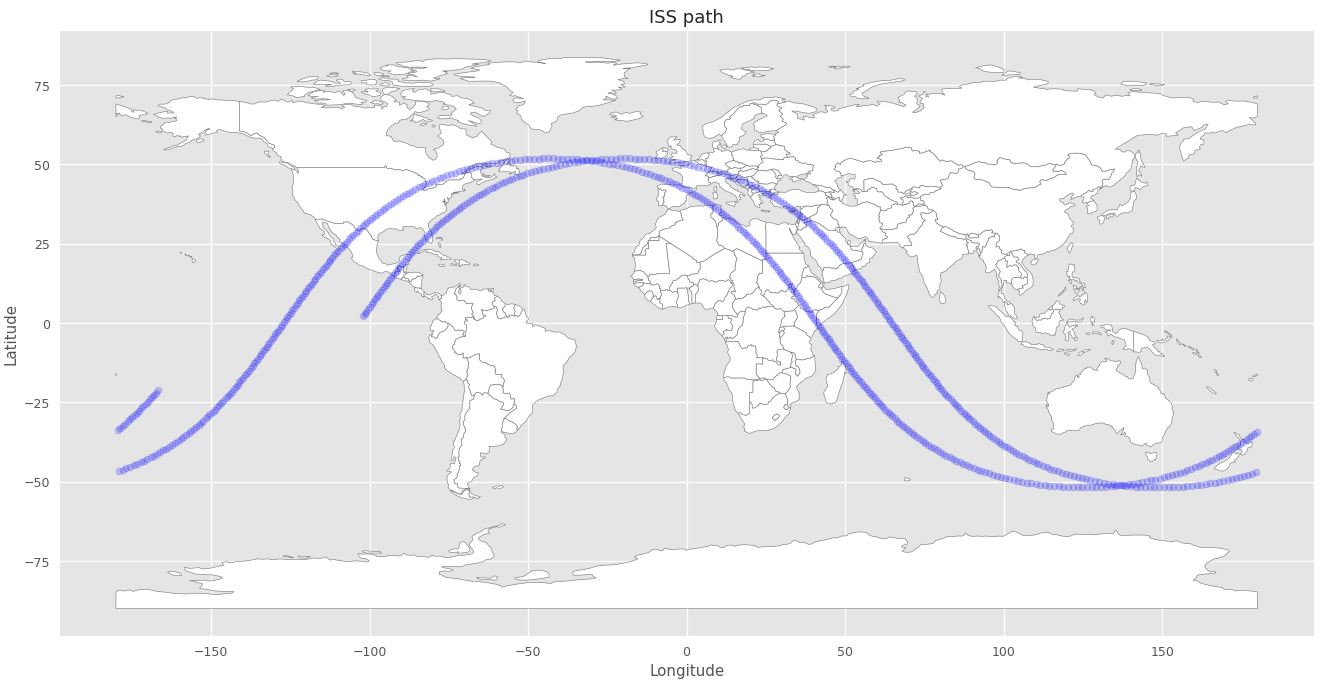

In [7]:
import os
import pandas
import matplotlib.pyplot as plt
import geopandas

file = os.path.join(path_atlantes, RESULTS_FILE)  # Ruta completa fichero CSV entrada

data = pandas.read_csv(file)                  # Leemos el fichero completo

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

with plt.style.context(("seaborn", "ggplot")):
    world.plot(figsize=(18,10), color="white", edgecolor="grey")
    # Dibujamos en azul los puntos donde se encontraba la ISS en cada iteración
    plt.scatter(data.longitude, data.latitude, zorder=1, alpha= 0.2, c='blue', s=30)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("ISS path");

Lo siguiente que haremos es localizar algunos puntos interesantes de la serie de datos. Visualizando las fotos y apoyándonos en la representación de los puntos que hemos hecho sobre el plano terrestre, podemos destacar los siguientes puntos (los indicaremos con el nombre del archivo de la foto y la hora a la que se tomó; todos los datos corresponden al día 2022-04-26):

|Foto|Hora|Latitud|Longitud|Zona|GMaps|Evento|
|:---|:---|:------|:-------|:---|:----|:-----|
|atlantes_047.jpg|08:22:33|35.332735|-72.734483|Atlántico Norte|[Ver](https://goo.gl/maps/HJTVcULLtXcDaMWy8)|Amanecer|
|atlantes_097.jpg|08:35:03|51.425035|-10.440319|Atlántico Norte|[Ver](https://goo.gl/maps/skiUxQAnChrhYMd16)|Comienza sobrevuelo Irlanda|
|atlantes_100.jpg|08:35:48|50.963622|-6.056691|Atlántico Norte|[Ver](https://goo.gl/maps/joS3hY9ZqLv3tzBJ6)|Comienza sobrevuelo Gran Bretaña|
|atlantes_104.jpg|08:36:48|50.077849|-0.381559|Canal de la Mancha|[Ver](https://goo.gl/maps/ajmEkdDD9cj29Ga58)|Canal de la Mancha; Comienza sobrevuelo Europa central|
|atlantes_125.jpg|08:42:03|41.262585|24.740723|Stavroupoli, Xánthi 670 62, Grecia|[Ver](https://goo.gl/maps/hcqccaN4fo8ZgtFK8)|Mar Egeo|
|atlantes_127.jpg|08:42:33|40.141351|26.700185|Üçpınar/Lapseki/Provincia de Çanakkale, Turquía|[Ver](https://goo.gl/maps/uQa7qgcj75gopr8b9)|Comienza sobrevuelo Turquía|
|atlantes_135.jpg|08:44:33|35.318439|33.881839|Yeni İskele|[Ver](https://goo.gl/maps/ofySjbymQZ4nSReg7)|Chipre|
|atlantes_138.jpg|08:45:18|33.390555|36.333239|Markaz Rif Dimashq District, Siria|[Ver](https://goo.gl/maps/BwUAYNyy6Mf1dQ5B8)|Comienza sobrevuelo península Arábiga; Beirut; Damasco|
|atlantes_162.jpg|08:51:18|16.464886|52.604445|Yemen|[Ver](https://goo.gl/maps/VPF497VzHRi4wRD78)|Comienza sobrevuelo Mar Arábigo y Océano Índico|
|atlantes_167.jpg|08:52:33|12.726177|55.498419|Mar Arábigo|[Ver](https://goo.gl/maps/vTfnVYXSZAd3AinY6)|Isla Socotra|
|atlantes_274.jpg|09:19:18|-51.718974|144.575088|Océano Índico|[Ver](https://goo.gl/maps/k7u6PnwNqHoTd41b7)|Anochecer|
|atlantes_419.jpg|09:55:33|35.685683|-95.861464|Twin Hills, Oklahoma, EE. UU.|[Ver](https://goo.gl/maps/jAcH22kuQ3X5QZYSA)|Amanecer|
|atlantes_452.jpg|10:03:48|50.689999|-58.408759|Golfo de San Lorenzo, Canadá|[Ver](https://goo.gl/maps/BvpiXAeqmVeMgvdn7)|Golfo de San Lorenzo|
|atlantes_455.jpg|10:04:33|51.233537|-54.068940|Atlántico Norte|[Ver](https://goo.gl/maps/DusoXsRFbnvkdZwt9)|Comienza sobrevuelo Atlántico Norte|
|atlantes_492.jpg|10:13:48|43.607322|-3.464841|Mar Cantábrico|[Ver](https://goo.gl/maps/YLnLt1TX8NUeFNP37)|Comienza sobrevuelo norte España|
|atlantes_494.jpg|10:14:18|42.576966|-1.344090|Aibar, 31460, Navarra|[Ver](https://goo.gl/maps/Yq7SUXJmrTeDY2Dt6)|Pamplona|
|atlantes_497.jpg|10:15:03|40.952546|1.698297|Mar Balear|[Ver](https://goo.gl/maps/Zx9QJcEv2GNR1wje8)|Comienza sobrevuelo Mediterraneo|
|atlantes_499.jpg|10:15:33|39.821301|3.637553|Mar Balear|[Ver](https://goo.gl/maps/jYt6XWt3SzRbd6Hs7)|Islas Baleares|
|atlantes_504.jpg|10:16:48|36.841835|8.197677|Berrihane, Argelia|[Ver](https://goo.gl/maps/vC7SThnWGK2QVbmYA)|Comienza sobrevuelo Norte de África entrando por Argelia|
|atlantes_510.jpg|10:18:18|33.024493|13.179739|Mar Mediterráneo|[Ver](https://goo.gl/maps/qqueTiqQbNyF6vzs7)|Trípoli|
|atlantes_540.jpg|10:25:48|11.550924|32.783115|Al Renk, Sudán del Sur|[Ver](https://goo.gl/maps/SRjmXCENc54CLtra8)|Nilo Blanco|
|atlantes_542.jpg|10:26:18|10.040340|33.902225|Al Mabein, Sudán del Sur|[Ver](https://goo.gl/maps/iDdn4tK7MHCTzr5o6)|Embalse Roseires en Nilo Azul|
|atlantes_548.jpg|10:27:48|5.482418|37.198316|Guma, Etiopía|[Ver](https://goo.gl/maps/1Pa9tt73V9w6W6x76)|Lago Abaya|
|atlantes_557.jpg|10:30:03|-1.388801|42.051250|Océano Índico|[Ver](https://goo.gl/maps/FWVrccxQ6WLkki8F6)|Comienza sobrevuelo Océano Índico|
|atlantes_567.jpg|10:32:33|-9.002938|47.484864|Océano Índico|[Ver](https://goo.gl/maps/NuyJ13ddCRA1hA5s5)|Seychelles|
|atlantes_572.jpg|10:33:48|-12.774725|50.282752|Océano Índico|[Ver](https://goo.gl/maps/E5ZXDmNLpQ1d8LDSA)|Norte de Madagascar|
|atlantes_583.jpg|10:36:33|-20.913369|56.806294|Océano Índico|[Ver](https://goo.gl/maps/SP6g4jnQPmM9cFym9)|Islas Mauricio y Reunión|
|atlantes_646.jpg|10:52:18|-51.747995|121.810786|Océano Índico|[Ver](https://goo.gl/maps/TZ5E8qRzV6DyZviL7)|Anochecer|

Vamos a volver a representar las posiciones de la ISS sobre el plano terrestre pero esta vez señalando con distintos colores el nivel de insolación en el momento de realizar la foto. Dibujaremos los puntos correspondientes a la fase diurna en naranja y la fase nocturna en azul. Nuestro programa era capaz de calcular si la foto merecía la pena ser hecha por estar la Tierra recibiendo luz solar. Así, sólo tendremos fotos de los puntos en naranja, ahorrando espacio de almacenamiento en los puntos en azul al no realizarse la foto que hubiera resultado sin utilidad.

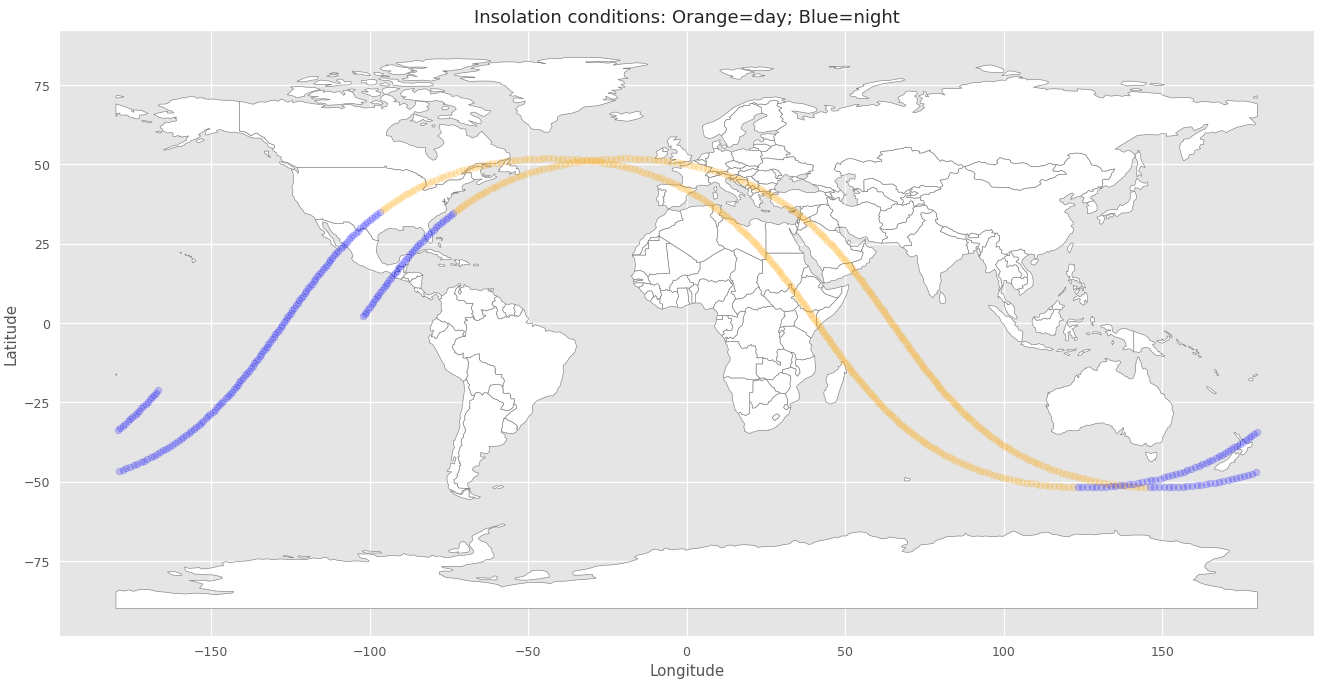

In [26]:
import os
import pandas
import matplotlib.pyplot as plt
import geopandas

file = os.path.join(path_atlantes, RESULTS_FILE)  # Ruta completa fichero CSV entrada

#data = pandas.read_csv(file)                     # Leemos el fichero completo
dataN1 = pandas.read_csv(file, nrows=46).tail(46)                 # Noche 1
dataD1 = pandas.read_csv(file, nrows=274).tail(228)               # Día 1
dataN2 = pandas.read_csv(file, nrows=418).tail(144)               # Noche 2
dataD2 = pandas.read_csv(file, nrows=646).tail(228)               # Día 2
dataN3 = pandas.read_csv(file, nrows=713).tail(67)                # Noche 3

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

with plt.style.context(("seaborn", "ggplot")):
    world.plot(figsize=(18,10), color="white", edgecolor="grey")
    plt.scatter(dataN1.longitude, dataN1.latitude, zorder=1, alpha= 0.2, c='blue', s=30)
    plt.scatter(dataD1.longitude, dataD1.latitude, zorder=1, alpha= 0.2, c='orange', s=30)
    plt.scatter(dataN2.longitude, dataN2.latitude, zorder=1, alpha= 0.2, c='blue', s=30)
    plt.scatter(dataD2.longitude, dataD2.latitude, zorder=1, alpha= 0.2, c='orange', s=30)
    plt.scatter(dataN3.longitude, dataN3.latitude, zorder=1, alpha= 0.2, c='blue', s=30)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Insolation conditions: Orange=day; Blue=night");

Este año la ISS ha tomado fotos de nuestro pais. Vamos a representar el sobrevuelo por la península ibérica para localizarlas.

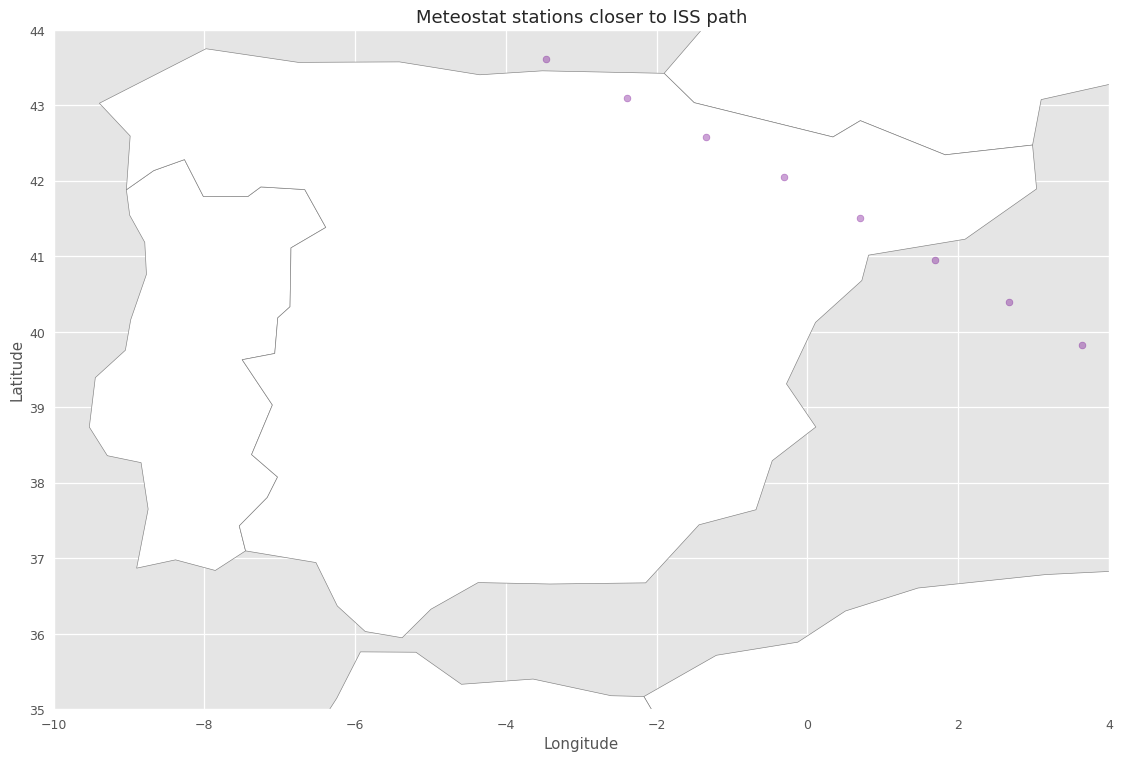

In [25]:
import os
import pandas
import matplotlib.pyplot as plt
import geopandas

file = os.path.join(path_atlantes, RESULTS_FILE)         # Ruta completa fichero CSV entrada

data = pandas.read_csv(file, nrows=499).tail(8)          # Leemos los datos del sobrevuelo de España (492 -> 499)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

with plt.style.context(("seaborn", "ggplot")):
    world.plot(figsize=(18,10), color="white", edgecolor="grey")
    # Dibujamos en rojo los puntos de las estaciones meteorológicas más próximas a la ISS
    plt.scatter(data.longitude, data.latitude, zorder=1, alpha= 0.2, c='red', s=30)
    # Dibujamos en azul los puntos donde se encontraba la ISS en cada iteración
    plt.scatter(data.longitude, data.latitude, zorder=1, alpha= 0.2, c='blue', s=30)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Meteostat stations closer to ISS path");
    plt.gca().set_xlim(-10, 4)                           # Ajustamos los límites del eje X
    plt.gca().set_ylim(35, 44)                           # Ajustamos los límites del eje Y

## Generación de gráficas

El fichero CSV generado en la fase 3 por nuestro programa ejecutado a bordo de la ISS contiene las siguientes columnas (y unidades):

* datetime (AAAA-MM-DD HH:MM:SS)
* picture_file (atlantes_NNN.jpg)
* latitude (º)
* longitude (º)
* elevation (m)
* temp_cpu (ºC)
* temp_h (ºC)
* temp_p (ºC)
* humidity (%)
* pressure (mbar)
* pitch (rad)
* roll (rad)
* yaw (rad)
* mag_x (μT)
* mag_y (μT)
* mag_z (μT)
* accel_x (g)
* accel_y (g)
* accel_z (g)
* gyro_x (rad/s)
* gyro_y (rad/s)
* gyro_z (rad/s)

Con todos estos datos vamos a dibujar gráficas para visualmente decidir cuales de ellos pueden ser más interesantes para representarlos en Minecraft. Durante las comparaciones pueden darse dos situaciones:

1. Comparar datos con la misma unidad, como por ejemplo `temp_cpu`, `temp_h` y `temp_p`
2. Comparar datos con distintas unidades, como por ejemplo `temp_cpu` y `mag_x`

En el primer caso dibujaremos las clásicas gráficas con dos ejes de coordenadas, X y Y. En este caso podremos representar tantas columnas de datos como deseemos.

En el segundo caso haremos gráficos con dos ejes verticales, uno a cada lado de la gráfica. En este último caso sólo podremos representar dos columnas de datos. Vamos a ver cómo hacer estos dos tipos de gráficas.

### Gráficas tipo 1: Datos con misma unidad

Por ejemplo vamos a dibujar en una misma gráfica las tres mediciones de temperatura obtenidos por los tres sensores distintos que miden esta magnitud instalados en AstroPi. La columna `datetime` hay que convertirla a objetos Python datetime para que la librería de gráficos interprete correctamente las fechas. Esto se hace indicando la posición de la columna en el parámetro `parse_dates` de la función `read_csv()`.

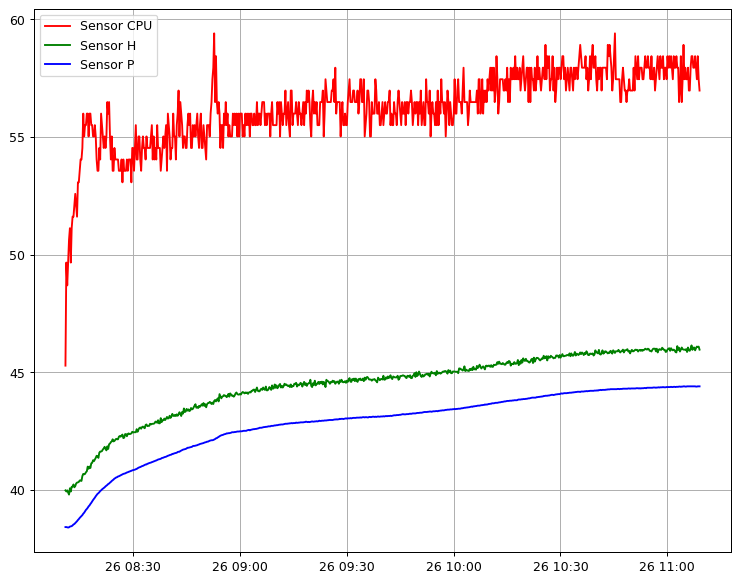

In [6]:
import os
import pandas

file = os.path.join(path_atlantes, RESULTS_FILE)    # Ruta completa fichero CSV

# Leemos todo el fichero
data = pandas.read_csv(file, parse_dates=[0])

# Columnas en fichero:
#    "datetime", "picture_file", "latitude", "longitude", "elevation", "temp_cpu", "temp_h", "temp_p",
#    "humidity", "pressure", "pitch", "roll", "yaw", "mag_x", "mag_y", "mag_z",
#    "accel_x", "accel_y", "accel_z", "gyro_x", "gyro_y", "gyro_z"
data_x = data.datetime                        # Datos de la columna 'datetime'
data_y1 = data.temp_cpu                       # Datos de la columna 'temp_cpu'
data_y2 = data.temp_h                         # Datos de la columna 'temp_h'
data_y3 = data.temp_p                         # Datos de la columna 'temp_p'


fig, ax = plt.subplots()                                      # Preparamos los objetos para matplotlib
ax.plot(data_x, data_y1, label="Sensor CPU", color="red")     # 'temp_cpu' frente a 'datetime'
ax.plot(data_x, data_y2, label="Sensor H", color="green")     # 'temp_h' frente a 'datetime'
ax.plot(data_x, data_y3, label="Sensor P", color="blue")      # 'temp_p' frente a 'datetime'

plt.legend()                                  # Incluimos una leyenda en la gráfica
plt.grid()                                    # Incluimos una rejilla en la gráfica
plt.show()                                    # Mostramos la gráfica

Aunque no tiene importancia de cara a nuestro proyecto, ya vemos que las distintas medidas de temperatura de AstroPi Mark II no son muy fiables. Parece evidente que el calor generado por Raspberry Pi 4 afecta mucho a estos sensores.

### Gráficas tipo 2: Datos con distintas unidades

Para ilustrar este caso vamos a representar por ejemplo las columnas de datos `temp_p` (eje izquierdo) y `pressure` (eje derecho) frente al tiempo (gracias a [este artículo](https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/) por el ejemplo).

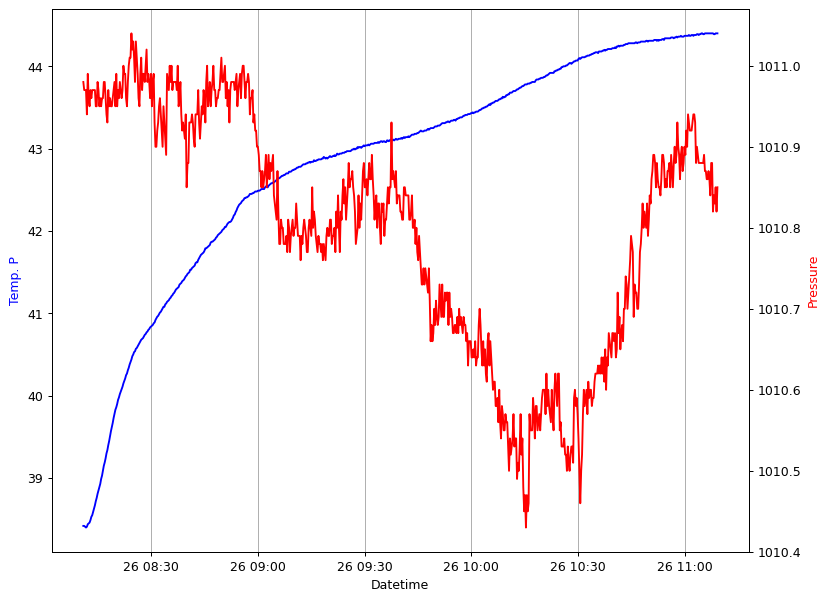

In [8]:
import os
import pandas

file = os.path.join(path_atlantes, RESULTS_FILE)    # Ruta completa fichero CSV

# Leemos todo el fichero
data = pandas.read_csv(file, parse_dates=[0])

# Columnas en fichero:
#    "datetime", "picture_file", "latitude", "longitude", "elevation", "temp_cpu", "temp_h", "temp_p",
#    "humidity", "pressure", "pitch", "roll", "yaw", "mag_x", "mag_y", "mag_z",
#    "accel_x", "accel_y", "accel_z", "gyro_x", "gyro_y", "gyro_z"

data_x = data.datetime                        # Datos de la columna 'datetime'
data_y1 = data.temp_p                         # Datos de la columna 'temp_p'
data_y2 = data.pressure                       # Datos de la columna 'pressure'

fig, ax = plt.subplots()                      # Preparamos los objetos para dibujar con matplotlib
ax.set_xlabel('Datetime')                     # Ponemos leyenda al eje X

ax.plot(data_x, data_y1, color="blue")        # 'temp_p' frente a 'datetime' en rojo
ax.set_ylabel('Temp. P', color="blue")        # Ponemos leyenda al eje Y

ax2 = ax.twinx()                              # Generamos un nuevo eje vertical en la gráfica
ax2.plot(data_x, data_y2, color="red")        # 'pressure' frente a 'datetime' en azul
ax2.set_ylabel("Pressure", color="red")       # Ponemos leyenda al segundo eje Y

ax.grid(axis='x')                             # Incluimos una rejilla del eje X en la gráfica
plt.show()                                    # Mostramos la gráfica

Si necesitamos comparar más de dos series distintas de datos, aún tenemos una opción, que es situar las series una encima de otra en distintos gráficos con el eje horizontal coincidente. Por ejemplo:

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

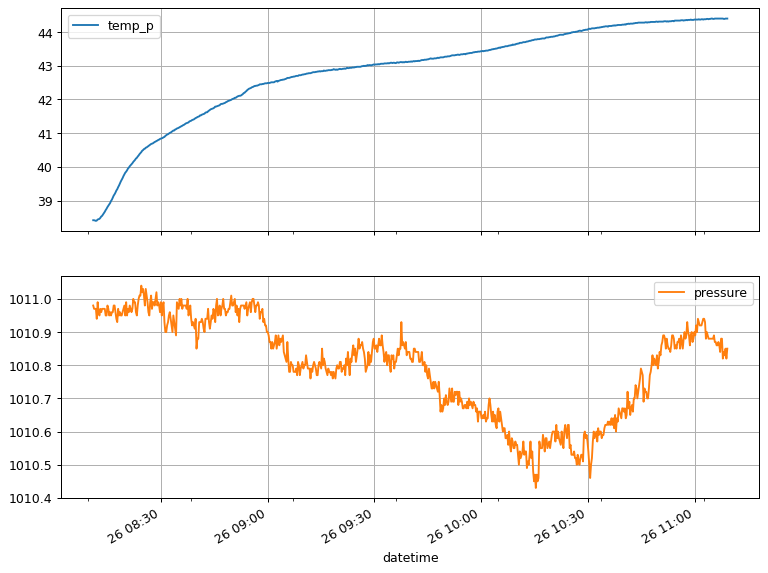

In [9]:
import os
import pandas

file = os.path.join(path_atlantes, RESULTS_FILE)    # Ruta completa fichero CSV

# Leemos todo el fichero e indicamos la columna que actuará como índice común para todos los datos
data = pandas.read_csv(file, parse_dates=[0], index_col='datetime')

data[['temp_p', 'pressure']].plot(subplots=True, grid=True)

Con estas técnicas de representación podremos hacer un análisis de los datos de cara a identificar las mejores series de datos para proceder a su gamificación.

## Gráficos en Minecraft

Lo primero que intentamos es dibujar algunas de las gráficas de los datos que aprendimos a hacer con `matplotlib` dentro de un mundo Minecraft.

Queríamos utilizar la versión del juego Minecraft Pi por tener las siguientes ventajas:

* Ejecutable en Raspberry Pi.
* No necesita una licencia de pago para experimentar con ella, lo que hubiera supuesto un problema para los alumnos.
* Implementa de serie la librería [mcpi](https://github.com/martinohanlon/mcpi) que permite manipular el juego desde código Python.

### Minecraft: Pi Edition: Reborn

Desafortunadamente la versión oficial de Minecraft Pi no se encontraba disponible todavía para la versión `Bullseye` de Raspbian OS que es el sistema que habíamos empezado a utilizar en Raspberry Pi poco antes de empezar el proyecto. Encontramos una alternativa que funciona de forma muy parecida llamada [Minecraft: Pi Edition: Reborn](https://github.com/MCPI-Revival/minecraft-pi-reborn) que funcionó muy bien.

Cuando abrimos la versión Reborn de Minecraft Pi nos aparecen una serie de cuadros de diálogo de opciones. Utilizaremos las siguientes opciones:

![Minecraft Pi - Options 1](images/mcpi_options_1.png)

![Minecraft Pi - Options 2](images/mcpi_options_2.png)

### API Minecraft Pi

La API de la librería `mcpi` puede encontrarse en [esta página](https://www.stuffaboutcode.com/p/minecraft-api-reference.html) de uno de los autores del fantástico libro [Adventures in Minecraft](www.wiley.com/buy/9781118946916) que enseña a manipular mundos Minecraft con código Python a través de distintos proyectos muy parecidos al nuestro.

Para que un programa Python conecte con el backend que hay dentro de Minecraft Pi para escuchar llamadas de la API `mcpi` sólo hay que hacer lo siguiente:

```python
from mcpi import minecraft
from mcpi import block

mc = minecraft.Minecraft.create()
```

Sobre el objeto `mc` invocaremos la mayoría de las llamadas de la [API](https://www.stuffaboutcode.com/p/minecraft-api-reference.html). Por ejemplo para crear un bloque de madera en la posición del mundo Minecraft (20, 4, 20) haremos:

```python
mc.setBlock(20, 4, 20, block.WOOD.id)
```

Si nos aproximamos a esa posición, deberíamos ver algo como lo siguiente:

![setBlock call](images/setBlock.png)

### Matplotlib - Minecraft Backend

Al principio de nuestra investigación sobre las posiblidades de Minecraft para alojar nuestros gráficos, descubrimos [esta librería](https://github.com/PetarMihalj/Matplotlib-Minecraft-Backend) que implementa un backend para `matplotlib` dentro de Minecraft. Era una de las ideas que teníamos en un principio, por lo que descubrir que ya estaba hecho nos hizo buscar otros objetivos.

Antes de ponernos con los nuevos objetivos vamos a ver brevemente las posibilidades de esta librería. La librería acompaña a este cuaderno en el repositorio, por lo que podremos utilizarla sin necesidad de instalarla.

Empezamos representando la gráfica de la temperatura detectada por el sensor de presión frente al tiempo. Lo conseguimos con el siguiente código:

In [6]:
import os
import pandas
from mc_mpl.mde import MDE
import matplotlib.pyplot as plt
import matplotlib as mpl
from mcpi import minecraft
from mcpi import block

# Constantes
IMAGE_WIDTH = 256
IMAGE_POS_X = -144
IMAGE_POS_Z = -138
MAX_HEIGHT = 32

mpl.use("module://mc_mpl.mc_backend")

mc = minecraft.Minecraft.create()

# Creamos mundo plano
# https://github.com/brooksc/mcpipy/blob/master/mcpi/examples/snowbound_flatmap.py
mc.setBlocks(IMAGE_POS_X, 0, IMAGE_POS_Z, IMAGE_POS_X+IMAGE_WIDTH, 64, IMAGE_POS_Z+IMAGE_WIDTH, block.AIR.id)
mc.setBlocks(IMAGE_POS_X, 0, IMAGE_POS_Z, IMAGE_POS_X+IMAGE_WIDTH, -64, IMAGE_POS_Z+IMAGE_WIDTH, block.SANDSTONE.id)

# Leemos todo el fichero
file = os.path.join(path_atlantes, RESULTS_FILE)    # Ruta completa fichero CSV
data = pandas.read_csv(file, parse_dates=[0])

# Columnas en fichero:
#    "datetime", "picture_file", "latitude", "longitude", "elevation", "temp_cpu", "temp_h", "temp_p",
#    "humidity", "pressure", "pitch", "roll", "yaw", "mag_x", "mag_y", "mag_z",
#    "accel_x", "accel_y", "accel_z", "gyro_x", "gyro_y", "gyro_z"

data_x = data.datetime                   # Datos de la columna 'datetime'
data_y1 = data.temp_p                    # Datos de la columna 'temp_p'

# Dibujamos la gráfica
plt.plot(data_x, data_y1)
plt.show()

# Posicionamos al jugador sobre la gráfica
mc.player.setPos(-44, 68, 44)

Deberíamos ver algo parecido si miramos hacia abajo desde la posición en que nos sitúa el código:

![Temp P in Minecraft](images/temp_p_in_minecraft.png)

Si bajamos y nos posamos sobre la gráfica habremos cumplido el objetivo que nos propusimos con este proyecto, es decir "caminar sobre los datos":

![Walking over Temp P in Minecraft](images/temp_p_in_minecraft_walking.png)

## Análisis NDVI

Tras haber resuelto "demasiado fácilmente" el objetivo de representar gráficos de datos en Minecraft, gracias a la librería [Matplotlib - Minecraft Backend](https://github.com/PetarMihalj/Matplotlib-Minecraft-Backend), nos pusimos a pensar en otro tipo de gráficos que poder explotar dentro de los mundos virtuales de Minecraft. En seguida nos enfocamos a las fotografías, ya que resultan los más vistosos de todos los datos capturados por el programa que se ejecutó en Phase 3 en la estación. Además, como hemos comentando al principio del cuaderno, este año elegimos la Astro Pi con cámara IR en lugar de la VIS, para testear el desempeño del nuevo hardware Mark II sin depender demasiado de la precisión de las muestras. La idea que surgió en las sesiones de brainstorming de nuestro equipo fue elegir algunas fotos, colorearlas con las típicas escalas de color que se suelen utilizar para representar este índice y finalmente convertir los píxeles de color de las fotos a bloques de lana de colores en Minecraft. Los bloques de lana de Minecraft sólo admiten 16 colores distintos, por lo que las conversiones a NDVI de las fotos además de perder resolución en píxeles, perderán resolución de color, aunque esto en el esquema de representación gráfica del juego no desentonará.

Antes de resolver la forma de trasladar las fotos convertidas a NDVI y coloreadas con una escala, estudiamos primero en qué consiste NDVI y cómo se puede trabajar en Python con las fotos para efectuar los cálculos. El documento que nos sirvió de guía en general fue [Capture plant health with NDVI and Raspberry Pi](https://projects.raspberrypi.org/en/projects/astropi-ndvi/) de la Raspberry Pi Foundation. No vamos a repetir aquí las explicaciones que se dan en la guía mencionada antes; baste decir que el índice se obtiene con una sencilla operación aritmética aplicada a todos los píxeles de las fotos. Para hacer fácilmente los cálculos sobre todos los píxeles, se aprovecha la facilidad que ofrece para trabajar con matrices de datos multidimensionales de la librería [OpenCV](https://opencv.org/). Siguiendo la guía y adaptando el código a nuestros gustos y necesidades, llegamos a la definición de una serie de funciones que utilizaremos en lo sucesivo:

In [ ]:
import cv2
import numpy as np
from fastiecm import fastiecm

def display(image, image_name):
    image = np.array(image, dtype=float)/float(255)
    cv2.namedWindow(image_name)
    cv2.imshow(image_name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def contrast_stretch(im, percentile=True):
    if percentile:
        in_min = np.percentile(im, 5)
        in_max = np.percentile(im, 95)
    else:
        in_min = float(np.min(im))
        in_max = float(np.max(im))
    
    out_min = 0.0
    out_max = 255.0
    
    out = im - in_min
    out *= ((out_min - out_max) / (in_min - in_max))
    out += in_min
    
    return out

def scale_to_int(im):
    out = im + 1
    out *= 127.5
    out += -1
    return np.array(np.rint(out), dtype=int).clip(0,255)

def calc_ndvi(image):
    b, g, r = cv2.split(image)
    bottom = (b.astype(float) + r.astype(float))
    bottom[bottom==0] = 0.01
    ndvi = (b.astype(float) - r) / bottom
    return ndvi

La librería `fastiecm` se encuentra enlazada en la quinta página de la guía [Capture plant health with NDVI and Raspberry Pi](https://projects.raspberrypi.org/en/projects/astropi-ndvi/5), concretamente se puede obtener de [este enlace](https://projects-static.raspberrypi.org/projects/astropi-ndvi/5259003bfcc5a4a54c3340a04e124502a1466511/en/images/fastiecm.py). Está incorporada al repositorio de este cuaderno, por lo que se puede importar directamente como hemos visto en el código anterior. Esta librería básicamente es un vector de 256 posiciones con los colores de la siguiente escala que se suele utilizar para convertir a color los valores NDVI obtenidos desde las fotos:

![fastiecm look up table](images/NDVI_VGYRM_lutA.jpg)

Antes de continuar, vamos a elegir unas pocas de entre las 456 fotografías capturadas por la Astro Pi IR durante la ejecución de nuestro código el 26 de abril de 2022.